**INITIALIZATION:**

In [4]:
# IMPORTING LIBRARIES AND DEPENDENCIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

import warnings 
warnings. filterwarnings('ignore')


**IMPOTING DATASET:**

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [6]:
# INSPECTING FEATURES
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
# SELECTED FEATURES 
df= df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
        'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg','MSRP']]

**Data preparation**

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [9]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [10]:
# INSPECTING MISSING VALUES
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [11]:
# HANDLING MISSING VALUES
df= df.fillna(0)

In [12]:
# INSPECTING DATAFRAME
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [13]:
# INSPECTING DATAFRAME
print(df.shape)

(11914, 10)


### Question 1
What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [14]:
# CALCULATING MODEL
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

In [15]:
# INSPECTING DATA TYPES
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [16]:
# SELECT FEATURE NUMERICAL
df_num= df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']]

# DATAFRAME INFORMATION
df_num.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,26.637485,19.733255
std,7.579740,110.507669,1.800554,8.863001,8.987798
min,1990.000000,0.000000,0.000000,12.000000,7.000000
25%,2007.000000,170.000000,4.000000,22.000000,16.000000
50%,2015.000000,225.000000,6.000000,26.000000,18.000000
75%,2016.000000,300.000000,6.000000,30.000000,22.000000
max,2017.000000,1001.000000,16.000000,354.000000,137.000000


In [17]:
# INSPECTING CORRELATION
df_num.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


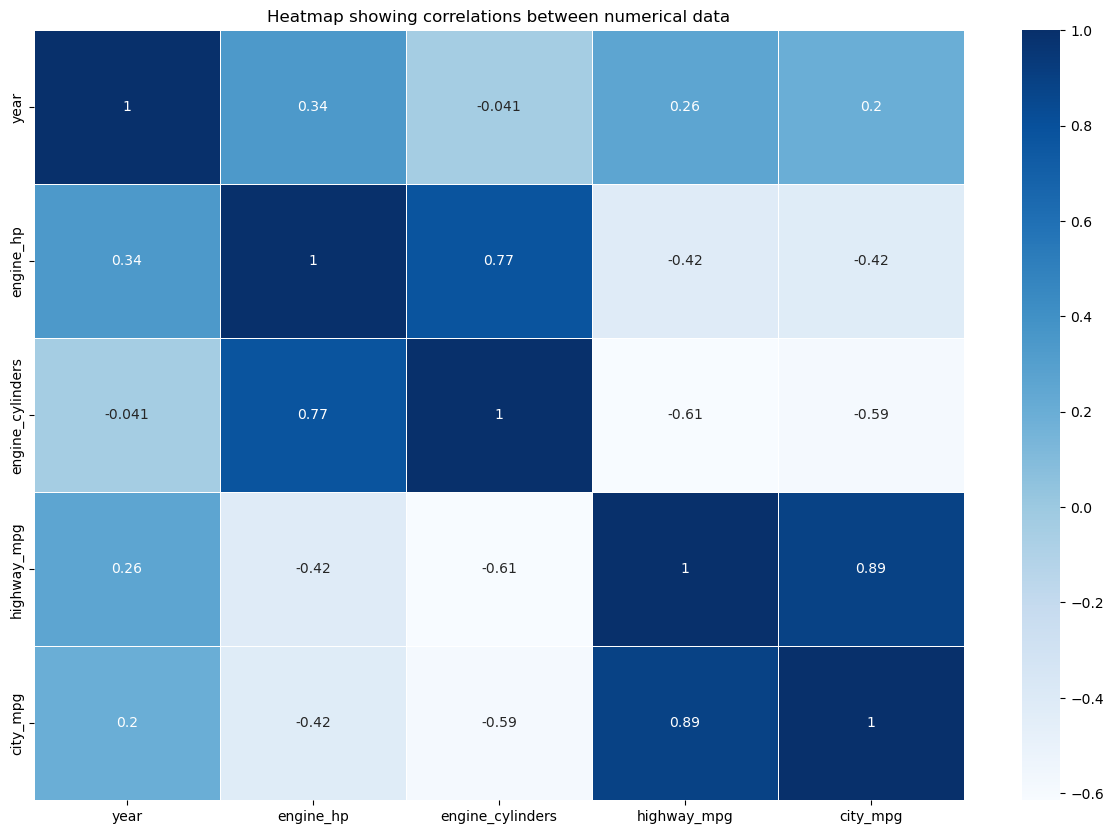

In [18]:
# INSPECTING HEATMAP
plt.figure(figsize=(15,10))  
sns.heatmap(df_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

**Make price binary**
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise

In [19]:
# PROCESSING DATASET
data= df.copy()

price_mean= df['price'].mean()

df['above_average']= (df['price'] > price_mean).astype(int)

del df['price']

df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


**Split the data**
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (price) is not in your dataframe.

In [20]:
#SPLITTING DATASET
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [21]:
# PROCESSING DATASET
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
# PROCESSING DATASET
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

### Question 3
- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

- make
- model
- transmission_type
- vehicle_style

In [23]:
# PREPARING DATASET
cat = ['make', 'model', 'transmission_type', 'vehicle_style']

#DEFINING FUNCTION
def calculate_mi(series):
    return round(mutual_info_score(series, df_train.above_average), 2)

# IMPLEMENTATION
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


### Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
 To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
 model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [24]:
# PREPARING DATASET
num_feature=['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
cat_feature=['make','model','transmission_type','vehicle_style']

In [25]:
# TRANSFORMING DATASET
train_dict = df_train[cat_feature+num_feature].to_dict(orient='records')

# VECTORIZING DATASET
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [26]:
# TRAINING LOGISTIC REGRESSION MODEL
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [27]:
# INITIALIZING MODEL PREDICTION
val_dict = df_val[cat_feature + num_feature].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

# INSPECTING ACCURACY
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


### Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg

Note: the difference doesn't have to be positive

In [28]:
# INITIALIZING FEATURES
features = num_feature + cat_feature
features

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'make',
 'model',
 'transmission_type',
 'vehicle_style']

**FEATURE ELIMINATION**

In [29]:
# INSPECTING THE DIFFRENCE IN ACCURACY
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

year 0.0020352496852705793 0.9479647503147294
engine_hp 0.029311791859001235 0.9206882081409987
engine_cylinders 0.0062316407889214664 0.9437683592110785
highway_mpg 0.00832983634074691 0.941670163659253
city_mpg 0.018401174989508995 0.931598825010491
make 0.025115400755350348 0.9248845992446496
model 0.03350818296265212 0.9164918170373478
transmission_type 0.00832983634074691 0.941670163659253
vehicle_style 0.013785144775493086 0.9362148552245069


### Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

Note: If there are multiple options, select the smallest alpha.

In [30]:
# NORMALIZING DATA
data['price']= np.log1p(data['price'])

In [31]:
# SPLITTING DATASET
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [32]:
# PREPARING DATASET
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
# PREPARING DATASET
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [34]:
# DELETING DATASET
del df_train['price']
del df_val['price']
del df_test['price']

**RIDGE REGRESSION:**

In [35]:
# PREPARING DATASET
train_dict = df_train[num_feature + cat_feature].to_dict(orient='records')

In [36]:
# VECTORIZING DATASET
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[num_feature + cat_feature].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [37]:
# IRDGE REGRESSION IMPLEMENTATION
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.487
0.01 0.487
0.1 0.487
1 0.487
10 0.487
